# **Diabetes Prediction Project**


Diabetes affects how your body converts food into energy and is a chronic (long-lasting) health issue.When you have diabetes, your body either produces insufficient insulin or uses it improperly. Too much blood sugar remains in your bloodstream when there is insufficient insulin or when cells cease reacting to insulin. That can eventually lead to major health issues like kidney disease, eyesight loss,heart disease and can cause multi-organ damage.The major factors associated with diabetes are diet, exercise, weight,blood pressure, etc.

AIM:
- Performing EDA and necessary feature engineering step to clean and modify the data.
- Comparing different machine learning models for prediction of Diabetes.

**Dataset information**

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

Variables used in the dataset

 Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

 Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

 Insulin: 2-Hour serum insulin (mu U/ml)

 BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

Importing all important libraries and packages.

In [886]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
import plotly.express as px
import missingno as msno

In [887]:
#Reading data.
diabetes_raw = pd.read_excel("pima-indians-diabetes (2).xlsx")
diabetes=diabetes_raw.copy()

# **EDA**

## Descriptive analysis

In [888]:
# knowing the dimensions of the dataset.
diabetes.shape

(768, 9)

In [889]:
#showing top 5 records.
diabetes.head()

Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   Diabetes Pedigree Function  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

In [890]:
#showing bottom 5 records.
diabetes.tail()

Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     Diabetes Pedigree Function  Age  Outcome  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0

In [891]:
diabetes.columns = (diabetes.columns.str.strip().str.upper().str.replace(' ', '_'))

In [892]:
#displaying columns names.
diabetes.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN',
       'BMI', 'DIABETES_PEDIGREE_FUNCTION', 'AGE', 'OUTCOME'],
      dtype='object')

In [893]:
#overview of the dataset.
diabetes.describe(include='all')

PREGNANCIES     GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS     INSULIN  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              BMI  DIABETES_PEDIGREE_FUNCTION         AGE     OUTCOME  
count  768.000000                  768.000000  768.000000  768.000000  
mean    31.992578                    0.471876   33.240885    0.348958  
std      7.884160                    0.331329   11.760232    0.476951  
min      0.000000                    0.078000   21.000000    0.000000  
25%     27.300000                    0.243750   24.000000    0.000000  
50%     32.000000                    0.372500   29.000000    0.000000  
75%     36.600000                    0.626250   41.000000    1.000000  
max     67.100000                    2.420000   81.000000    1.000000

In [894]:
#Displaying count and null columns if any.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PREGNANCIES                 768 non-null    int64  
 1   GLUCOSE                     768 non-null    int64  
 2   BLOOD_PRESSURE              768 non-null    int64  
 3   SKIN_THICKNESS              768 non-null    int64  
 4   INSULIN                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DIABETES_PEDIGREE_FUNCTION  768 non-null    float64
 7   AGE                         768 non-null    int64  
 8   OUTCOME                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [895]:
#showing unique values in each column.
diabetes.nunique()

PREGNANCIES                    17
GLUCOSE                       136
BLOOD_PRESSURE                 47
SKIN_THICKNESS                 51
INSULIN                       186
BMI                           248
DIABETES_PEDIGREE_FUNCTION    517
AGE                            52
OUTCOME                         2
dtype: int64

In [896]:
#dropping duplicates from the database.
diabetes.drop_duplicates()

PREGNANCIES  GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS  INSULIN   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     DIABETES_PEDIGREE_FUNCTION  AGE  OUTCOME  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

In [897]:
# finding null values.
diabetes.isnull().sum()


PREGNANCIES                   0
GLUCOSE                       0
BLOOD_PRESSURE                0
SKIN_THICKNESS                0
INSULIN                       0
BMI                           0
DIABETES_PEDIGREE_FUNCTION    0
AGE                           0
OUTCOME                       0
dtype: int64

In [898]:
# Count number of zeros in all columns of Dataframe
for x in diabetes.columns:
    column = diabetes[x]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', x , ' is : ', count)

Count of zeros in column  PREGNANCIES  is :  111
Count of zeros in column  GLUCOSE  is :  5
Count of zeros in column  BLOOD_PRESSURE  is :  35
Count of zeros in column  SKIN_THICKNESS  is :  227
Count of zeros in column  INSULIN  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DIABETES_PEDIGREE_FUNCTION  is :  0
Count of zeros in column  AGE  is :  0
Count of zeros in column  OUTCOME  is :  500


From above zero value analysis, We see that column "skin Thickness" and "Insulin" have large number of zero values which are not acceptable.
As insulin values are directly co-related to the diabetes, we cannot delete them.Also if we delete the rows which have BMI=0 or BP=0 or Glucose=0, Large number of rows will be removed from the dataset which is not acceptable as the dataset is small.

while exploring the dataset we can see that their are 2 types of persons present in the dataset. First are diabetic and other are non-diabetic.
So to get the more clear insight, we need to devide the dataset into 2 different datasets. First- Diabetic_dataset and second non-diabetic_dataset

In [899]:
# Lets create a list of features whose values can't be zero
cols = ['GLUCOSE','BLOOD_PRESSURE','SKIN_THICKNESS','INSULIN','BMI']

In [900]:
#Replacing 0 with nan values
diabetes[cols] = diabetes[cols].replace(0, np.nan)

<AxesSubplot: >

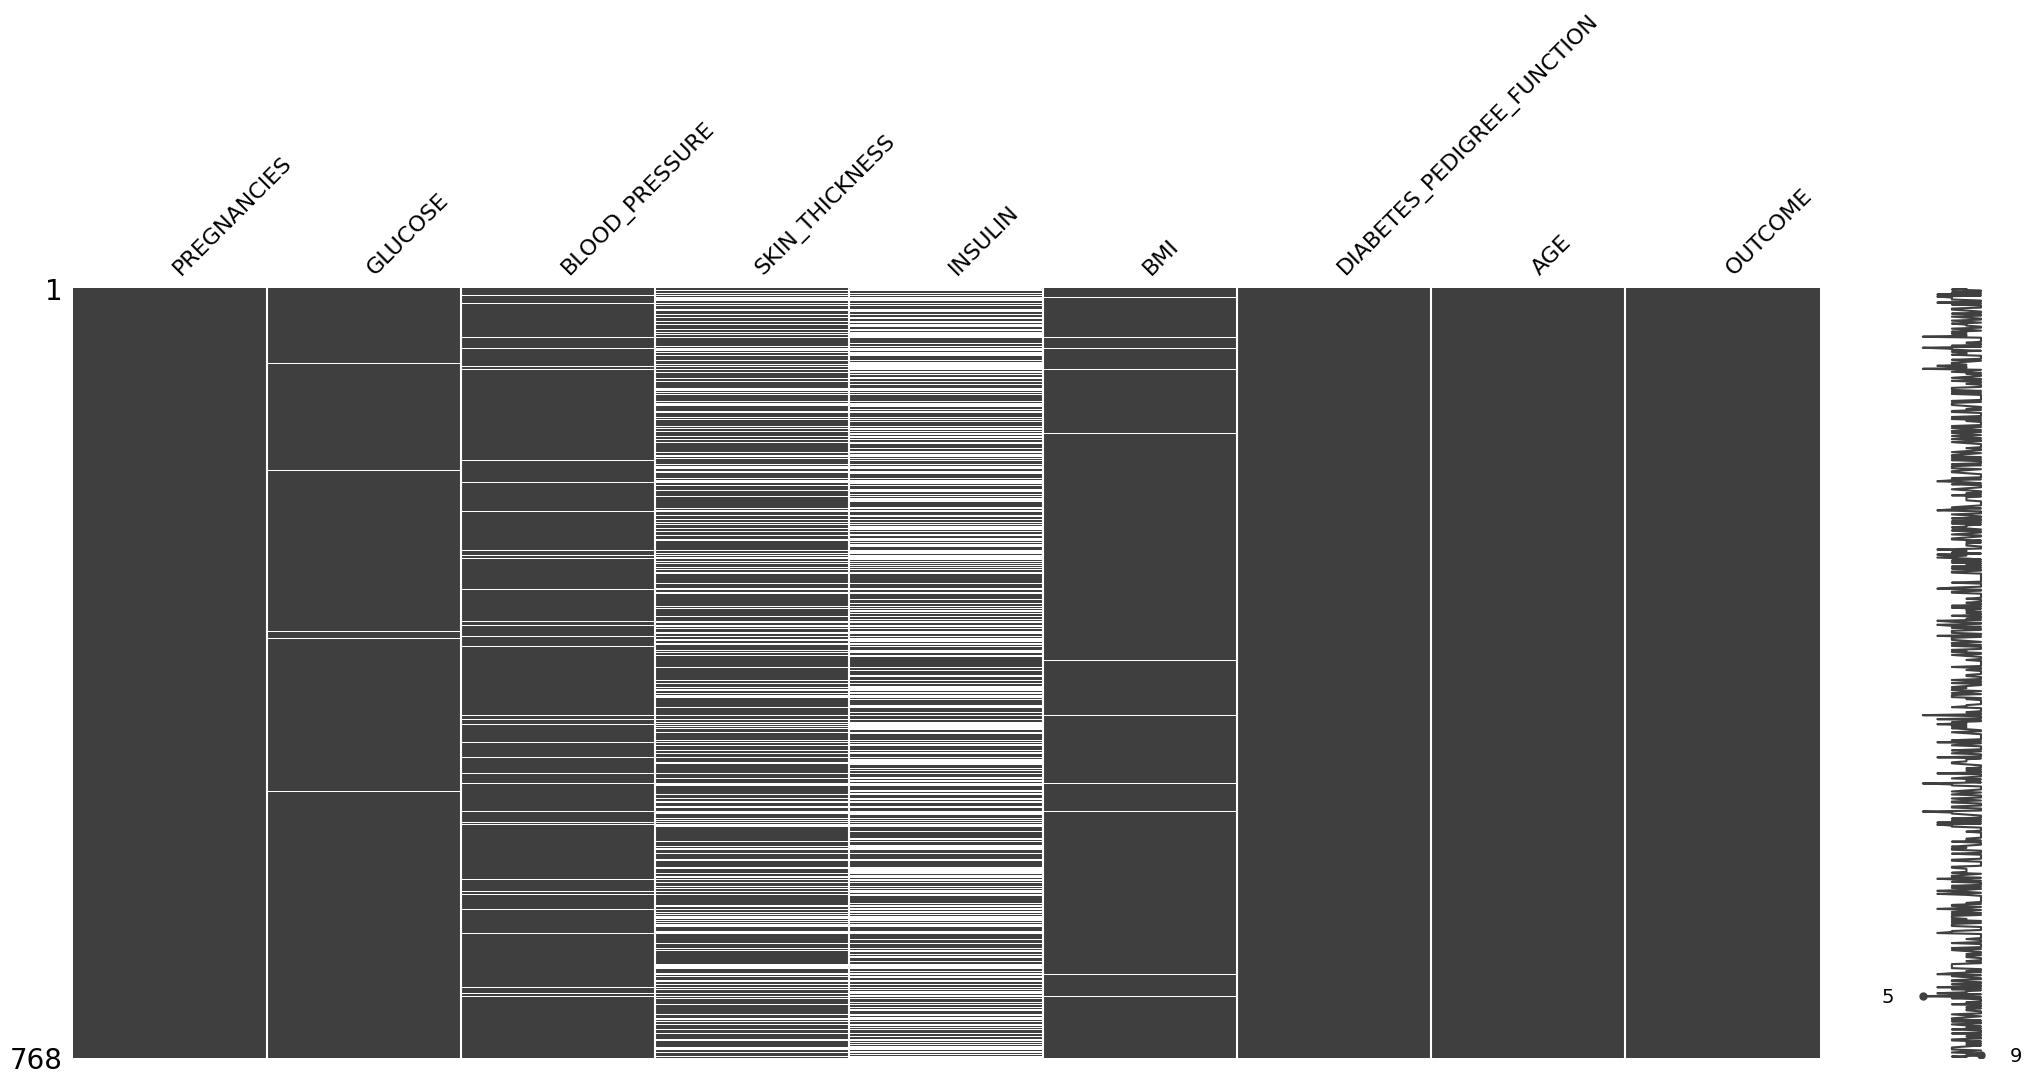

In [901]:
msno.matrix(diabetes)

In [902]:
# Again Checking for Zero Values
for x in diabetes.columns:
    column = diabetes[x]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', x , ' is : ', count)

Count of zeros in column  PREGNANCIES  is :  111
Count of zeros in column  GLUCOSE  is :  0
Count of zeros in column  BLOOD_PRESSURE  is :  0
Count of zeros in column  SKIN_THICKNESS  is :  0
Count of zeros in column  INSULIN  is :  0
Count of zeros in column  BMI  is :  0
Count of zeros in column  DIABETES_PEDIGREE_FUNCTION  is :  0
Count of zeros in column  AGE  is :  0
Count of zeros in column  OUTCOME  is :  500


In [903]:
# Showing the Count of missing values in columns
diabetes.isnull().sum()

PREGNANCIES                     0
GLUCOSE                         5
BLOOD_PRESSURE                 35
SKIN_THICKNESS                227
INSULIN                       374
BMI                            11
DIABETES_PEDIGREE_FUNCTION      0
AGE                             0
OUTCOME                         0
dtype: int64

In [904]:
#Checking null record in percentages
diabetes.isnull().sum()/ len(diabetes) * 100

PREGNANCIES                    0.000000
GLUCOSE                        0.651042
BLOOD_PRESSURE                 4.557292
SKIN_THICKNESS                29.557292
INSULIN                       48.697917
BMI                            1.432292
DIABETES_PEDIGREE_FUNCTION     0.000000
AGE                            0.000000
OUTCOME                        0.000000
dtype: float64

In [905]:
diabetes.skew(numeric_only=True)

PREGNANCIES                   0.901674
GLUCOSE                       0.530989
BLOOD_PRESSURE                0.134153
SKIN_THICKNESS                0.690619
INSULIN                       2.166464
BMI                           0.593970
DIABETES_PEDIGREE_FUNCTION    1.919911
AGE                           1.129597
OUTCOME                       0.635017
dtype: float64

In [906]:
# To avoid data leakage from outcome variable splitting the data set
Independent = diabetes.drop('OUTCOME',axis=1)
Independent.head()

PREGNANCIES  GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS  INSULIN   BMI  \
0            6    148.0            72.0            35.0      NaN  33.6   
1            1     85.0            66.0            29.0      NaN  26.6   
2            8    183.0            64.0             NaN      NaN  23.3   
3            1     89.0            66.0            23.0     94.0  28.1   
4            0    137.0            40.0            35.0    168.0  43.1   

   DIABETES_PEDIGREE_FUNCTION  AGE  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33

In [907]:
Dependent = diabetes['OUTCOME'] # target variable
Dependent.head()

0    1
1    0
2    1
3    0
4    1
Name: OUTCOME, dtype: int64

## Doing missing value imputation using KNN imputation algorithm

In [908]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.102
Imputing row 101/768 with 2 missing, elapsed time: 0.104
Imputing row 201/768 with 1 missing, elapsed time: 0.104
Imputing row 301/768 with 3 missing, elapsed time: 0.108
Imputing row 401/768 with 2 missing, elapsed time: 0.109
Imputing row 501/768 with 0 missing, elapsed time: 0.109
Imputing row 601/768 with 1 missing, elapsed time: 0.109
Imputing row 701/768 with 0 missing, elapsed time: 0.109


C:\Users\prate\AppData\Local\Temp\ipykernel_22156\2857701596.py:5: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [909]:
# Checking for null values again.
Independent_knn.isnull().sum()


PREGNANCIES                   0
GLUCOSE                       0
BLOOD_PRESSURE                0
SKIN_THICKNESS                0
INSULIN                       0
BMI                           0
DIABETES_PEDIGREE_FUNCTION    0
AGE                           0
dtype: int64

In [910]:
diabetes = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
diabetes.head(10)

PREGNANCIES  GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS     INSULIN  \
0          6.0    148.0       72.000000       35.000000  162.853908   
1          1.0     85.0       66.000000       29.000000   62.914766   
2          8.0    183.0       64.000000       26.449809  180.561537   
3          1.0     89.0       66.000000       23.000000   94.000000   
4          0.0    137.0       40.000000       35.000000  168.000000   
5          5.0    116.0       74.000000       19.939566  106.227530   
6          3.0     78.0       50.000000       32.000000   88.000000   
7         10.0    115.0       77.199244       34.672709  135.233511   
8          2.0    197.0       70.000000       45.000000  543.000000   
9          8.0    125.0       96.000000       24.794369  188.684620   

         BMI  DIABETES_PEDIGREE_FUNCTION   AGE  OUTCOME  
0  33.600000                       0.627  50.0        1  
1  26.600000                       0.351  31.0        0  
2  23.300000                       0.672  32.0        1  
3  28.100000                       0.167  21.0        0  
4  43.100000                       2.288  33.0        1  
5  25.600000                       0.201  30.0        0  
6  31.000000                       0.248  26.0        1  
7  35.300000                       0.134  29.0        0  
8  30.500000                       0.158  53.0        1  
9  32.751616                       0.232  54.0        1

In [911]:
diabetes.skew(numeric_only=True)

PREGNANCIES                   0.901674
GLUCOSE                       0.531994
BLOOD_PRESSURE                0.134180
SKIN_THICKNESS                0.663955
INSULIN                       2.088022
BMI                           0.603886
DIABETES_PEDIGREE_FUNCTION    1.919911
AGE                           1.129597
OUTCOME                       0.635017
dtype: float64

## Data exploration

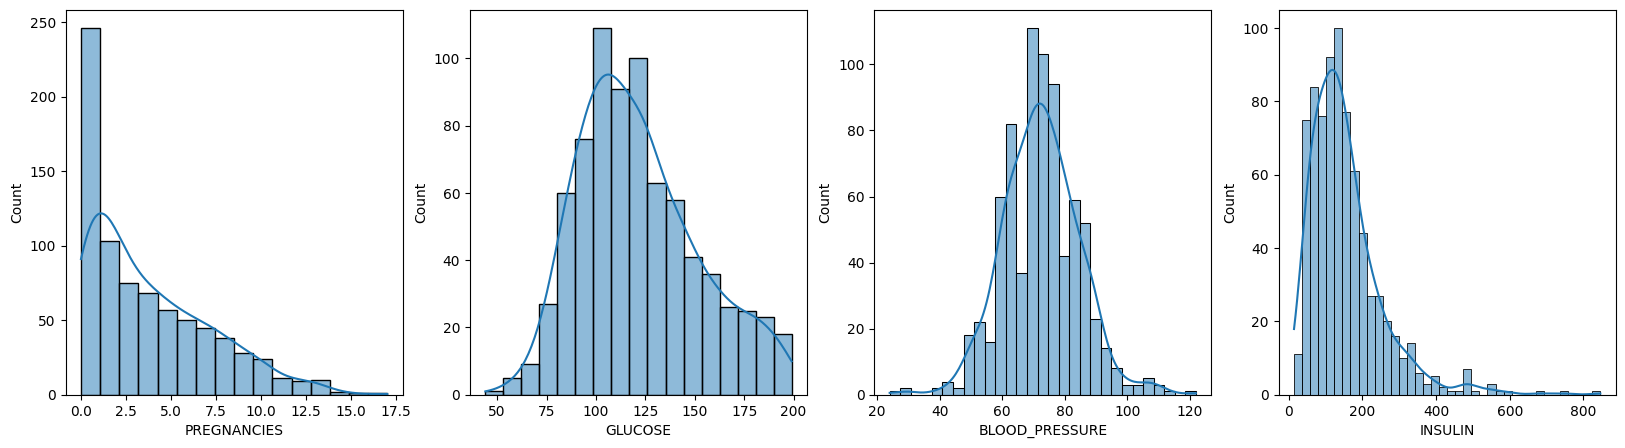

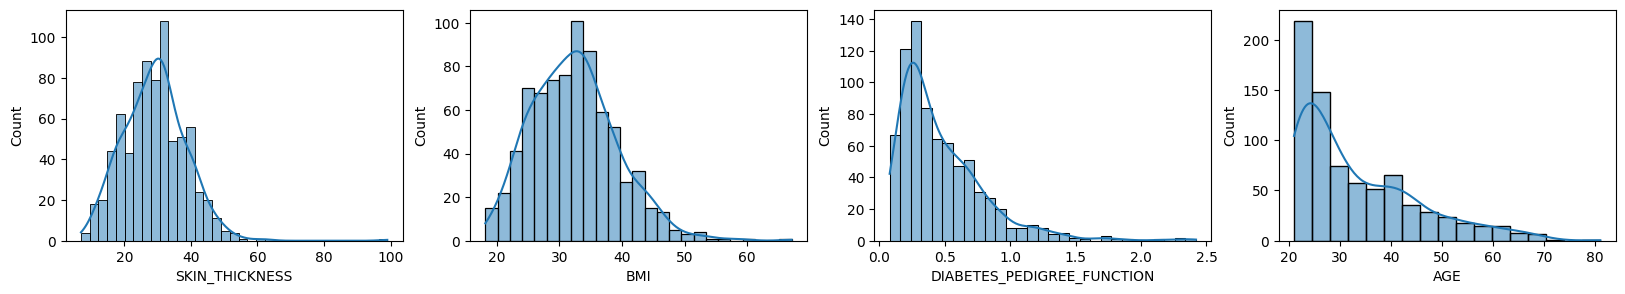

In [912]:
fig, ax = plt.subplots(1,4,figsize=(20, 5))
sns.histplot(x='PREGNANCIES', data=diabetes,ax=ax[0], kde=True)
sns.histplot(x='GLUCOSE', data=diabetes,ax=ax[1],kde=True)
sns.histplot(x='BLOOD_PRESSURE', data=diabetes,ax=ax[2],kde=True)
sns.histplot(x='INSULIN', data=diabetes,ax=ax[3],kde=True)
plt.show()
fig, ax = plt.subplots(1,4,figsize=(20, 3))
sns.histplot(x='SKIN_THICKNESS', data=diabetes,ax=ax[0],kde=True)
sns.histplot(x='BMI', data=diabetes,ax=ax[1],kde=True)
sns.histplot(x='DIABETES_PEDIGREE_FUNCTION', data=diabetes,ax=ax[2],kde=True)
sns.histplot(x='AGE', data=diabetes,ax=ax[3],kde=True)
plt.show()

# Doing log transformations

In [913]:
diabetes.PREGNANCIES= np.log1p(diabetes.PREGNANCIES)
diabetes.GLUCOSE= np.log1p(diabetes.GLUCOSE)
diabetes.BLOOD_PRESSURE= np.log1p(diabetes.BLOOD_PRESSURE)
diabetes.INSULIN= np.log1p(diabetes.INSULIN)
diabetes.SKIN_THICKNESS= np.log1p(diabetes.SKIN_THICKNESS)
diabetes.BMI= np.log1p(diabetes.BMI)
diabetes.DIABETES_PEDIGREE_FUNCTION= np.log1p(diabetes.DIABETES_PEDIGREE_FUNCTION)
diabetes.AGE= np.log1p(diabetes.AGE)

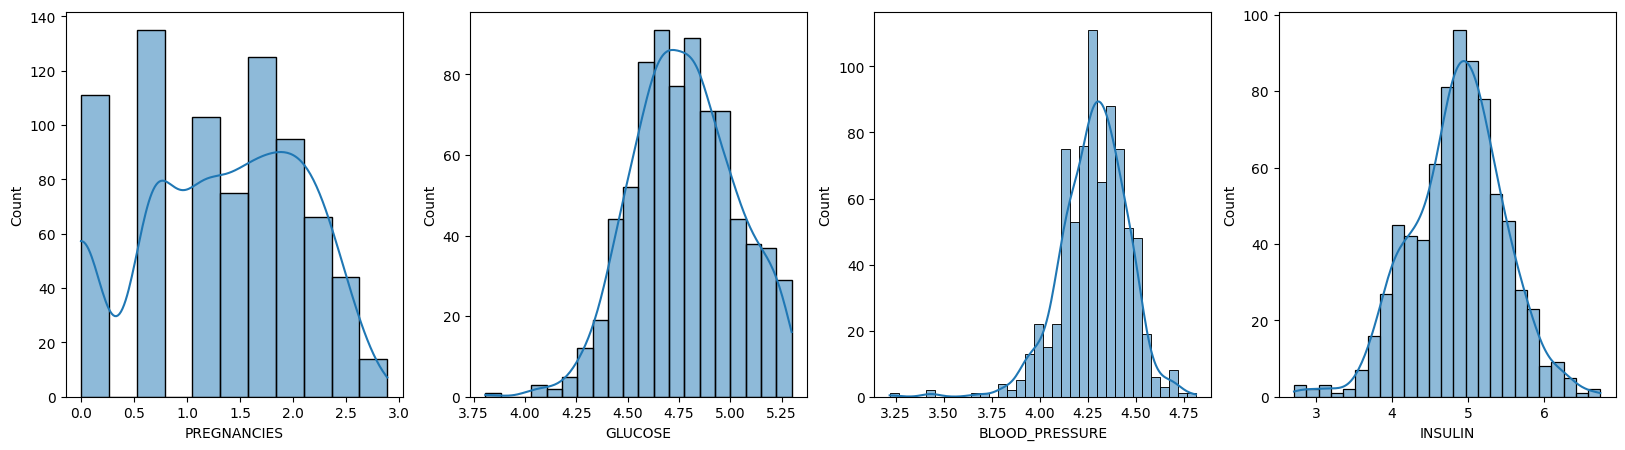

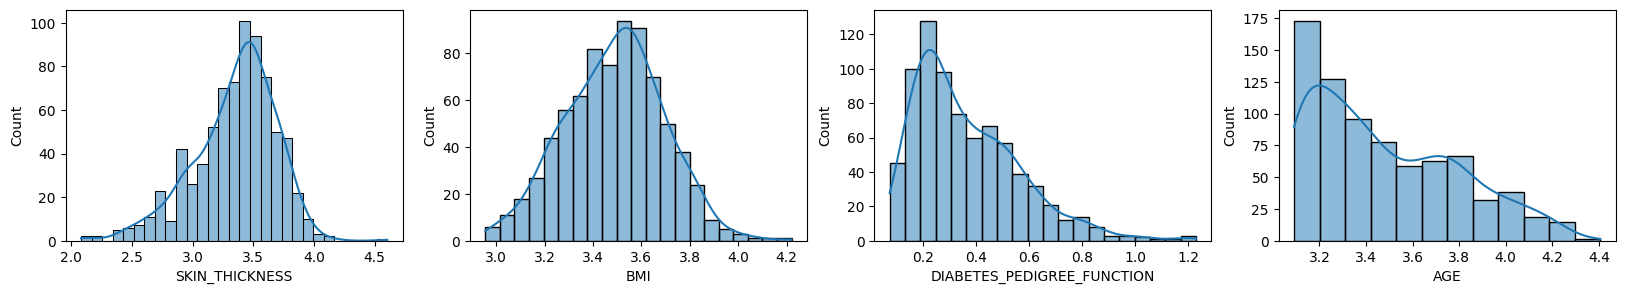

In [914]:
fig, ax = plt.subplots(1,4,figsize=(20, 5))
sns.histplot(x='PREGNANCIES', data=diabetes,ax=ax[0], kde=True)
sns.histplot(x='GLUCOSE', data=diabetes,ax=ax[1],kde=True)
sns.histplot(x='BLOOD_PRESSURE', data=diabetes,ax=ax[2],kde=True)
sns.histplot(x='INSULIN', data=diabetes,ax=ax[3],kde=True)
plt.show()
fig, ax = plt.subplots(1,4,figsize=(20, 3))
sns.histplot(x='SKIN_THICKNESS', data=diabetes,ax=ax[0],kde=True)
sns.histplot(x='BMI', data=diabetes,ax=ax[1],kde=True)
sns.histplot(x='DIABETES_PEDIGREE_FUNCTION', data=diabetes,ax=ax[2],kde=True)
sns.histplot(x='AGE', data=diabetes,ax=ax[3],kde=True)
plt.show()

### 1-Outlier detection

In [915]:
fig = px.box(diabetes, y=['PREGNANCIES','GLUCOSE','BLOOD_PRESSURE','SKIN_THICKNESS','INSULIN','BMI','DIABETES_PEDIGREE_FUNCTION','AGE'], width=1400, height=400)
fig.show()

### There are many outliers present in the data. we need to handle them.
### so, here i am using the IQR method and capping the outliers to the upper and lower limits respectively.

In [916]:
q1=diabetes.BMI.quantile(0.25)
q3=diabetes.BMI.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.BMI=np.where(diabetes.BMI>upper_bound,upper_bound,diabetes.BMI)

In [917]:
q1=diabetes.INSULIN.quantile(0.25)
q3=diabetes.INSULIN.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.INSULIN=np.where(diabetes.INSULIN>upper_bound,upper_bound,diabetes.INSULIN)
diabetes.INSULIN=np.where(diabetes.INSULIN<lower_bound,lower_bound,diabetes.INSULIN)

In [918]:
q1=diabetes.SKIN_THICKNESS.quantile(0.25)
q3=diabetes.SKIN_THICKNESS.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.SKIN_THICKNESS=np.where(diabetes.SKIN_THICKNESS>upper_bound,upper_bound,diabetes.SKIN_THICKNESS)
diabetes.SKIN_THICKNESS=np.where(diabetes.SKIN_THICKNESS<lower_bound,lower_bound,diabetes.SKIN_THICKNESS)

In [919]:
q1=diabetes.BLOOD_PRESSURE.quantile(0.25)
q3=diabetes.BLOOD_PRESSURE.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.BLOOD_PRESSURE=np.where(diabetes.BLOOD_PRESSURE>upper_bound,upper_bound,diabetes.BLOOD_PRESSURE)
diabetes.BLOOD_PRESSURE=np.where(diabetes.BLOOD_PRESSURE<lower_bound,lower_bound,diabetes.BLOOD_PRESSURE)

In [920]:
q1=diabetes.PREGNANCIES.quantile(0.25)
q3=diabetes.PREGNANCIES.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.PREGNANCIES=np.where(diabetes.PREGNANCIES>upper_bound,upper_bound,diabetes.PREGNANCIES)

In [921]:
q1=diabetes.DIABETES_PEDIGREE_FUNCTION.quantile(0.25)
q3=diabetes.DIABETES_PEDIGREE_FUNCTION.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.DIABETES_PEDIGREE_FUNCTION=np.where(diabetes.DIABETES_PEDIGREE_FUNCTION>upper_bound,upper_bound,diabetes.DIABETES_PEDIGREE_FUNCTION)

In [922]:
q1=diabetes.AGE.quantile(0.25)
q3=diabetes.AGE.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.AGE=np.where(diabetes.AGE>upper_bound,upper_bound,diabetes.AGE)

In [923]:
q1=diabetes.GLUCOSE.quantile(0.25)
q3=diabetes.GLUCOSE.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
diabetes.GLUCOSE=np.where(diabetes.GLUCOSE>upper_bound,upper_bound,diabetes.GLUCOSE)
diabetes.GLUCOSE=np.where(diabetes.GLUCOSE<lower_bound,lower_bound,diabetes.GLUCOSE)

In [924]:
fig = px.box(diabetes, y=['PREGNANCIES','GLUCOSE','BLOOD_PRESSURE','SKIN_THICKNESS','INSULIN','BMI','DIABETES_PEDIGREE_FUNCTION','AGE'], width=1200, height=600)
fig.show()

In [925]:
diabetes.skew(numeric_only=True)

PREGNANCIES                  -0.243478
GLUCOSE                      -0.002175
BLOOD_PRESSURE               -0.243979
SKIN_THICKNESS               -0.512187
INSULIN                      -0.096796
BMI                          -0.071475
DIABETES_PEDIGREE_FUNCTION    0.847455
AGE                           0.614664
OUTCOME                       0.635017
dtype: float64

#### Even after removing outliers, columns are skewed. 
#### However, as per central limit theorem if sample size is more than 30 we are good to go.

In [926]:
diabetes.sample(10)

PREGNANCIES   GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS   INSULIN  \
67      1.098612  4.700480        4.532599        3.526662  4.937110   
457     1.791759  4.465908        4.234107        3.367296  4.276666   
208     0.693147  4.574711        4.174387        3.332205  4.477337   
504     1.386294  4.574711        4.369448        3.688879  4.973569   
277     0.000000  4.653960        4.174387        3.178054  4.762174   
510     2.564949  4.442651        4.290459        3.465736  4.327911   
291     0.000000  4.682131        4.143135        3.433987  4.317488   
119     1.609438  4.605170        4.343805        2.772589  3.951244   
39      1.609438  4.718499        4.290459        3.871201  5.337538   
136     0.000000  4.615121        4.262680        3.295837  3.931826   

          BMI  DIABETES_PEDIGREE_FUNCTION       AGE  OUTCOME  
67   3.777348                    0.612479  4.007333        0  
457  3.440418                    0.310422  3.218876        0  
208  3.532226                    0.253867  3.091042        0  
504  3.645450                    0.213497  3.713572        0  
277  3.360375                    0.374318  3.178054        0  
510  3.424263                    0.260054  3.850148        1  
291  3.627004                    0.563608  3.258097        1  
119  3.186353                    0.201307  3.091042        0  
39   3.640214                    0.871293  4.043051        1  
136  3.459466                    0.468127  3.091042        0

### 2. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Count of class is:
 0    500
1    268
Name: OUTCOME, dtype: int64


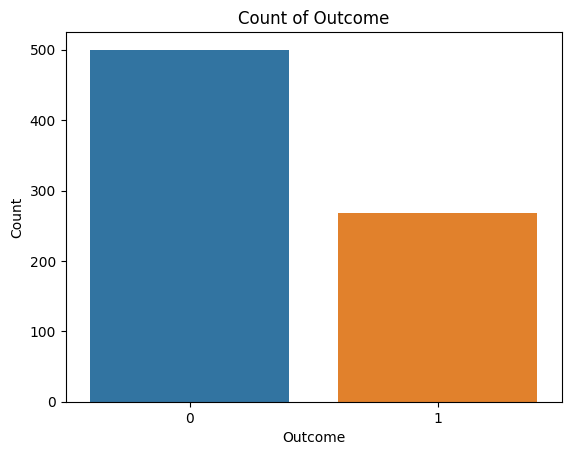

In [927]:
sns.countplot(x='OUTCOME', data=diabetes)
plt.title("Count of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",diabetes['OUTCOME'].value_counts())

The above visualisation makes it clearly evident that our dataset is completely unbalanced, with the proportion of diabetes patients being exactly half that of non-diabetic patients.
We will create fresh samples using **SMOTE (Synthetic Minority Oversampling Technique)** for the class "1" i.e. diabetes that is underrepresented in our data.

In [928]:
dia_X = diabetes.drop('OUTCOME', axis=1)
dia_y = diabetes['OUTCOME']
print(dia_X.shape, dia_y.shape)

(768, 8) (768,)


In [929]:
from imblearn.over_sampling import SMOTE

dia_X_resampled, dia_y_resampled = SMOTE(random_state=108).fit_resample(dia_X, dia_y)
print(dia_X_resampled.shape, dia_y_resampled.shape)

(1000, 8) (1000,)


### See our number of observations increased from 768 to 1000 and are now balanced.

Count of class is:
 1    500
0    500
Name: OUTCOME, dtype: int64


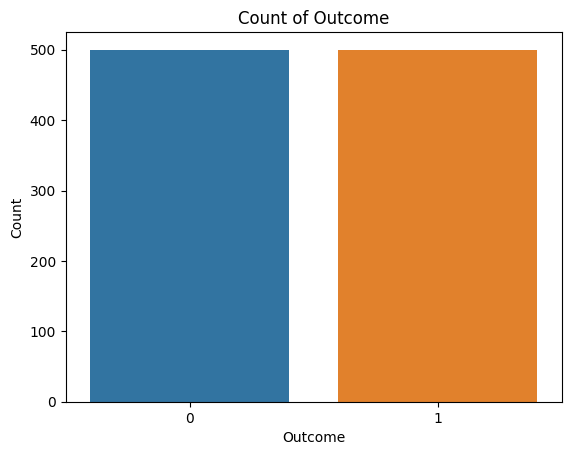

In [930]:
diabetes = pd.concat([dia_X_resampled, dia_y_resampled], axis=1)

# now again checking the imbalance of the data.
sns.countplot(x='OUTCOME', data=diabetes)
plt.title("Count of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",diabetes['OUTCOME'].value_counts())


#### Creating scatter charts between the pair of variables to understand the relationships.

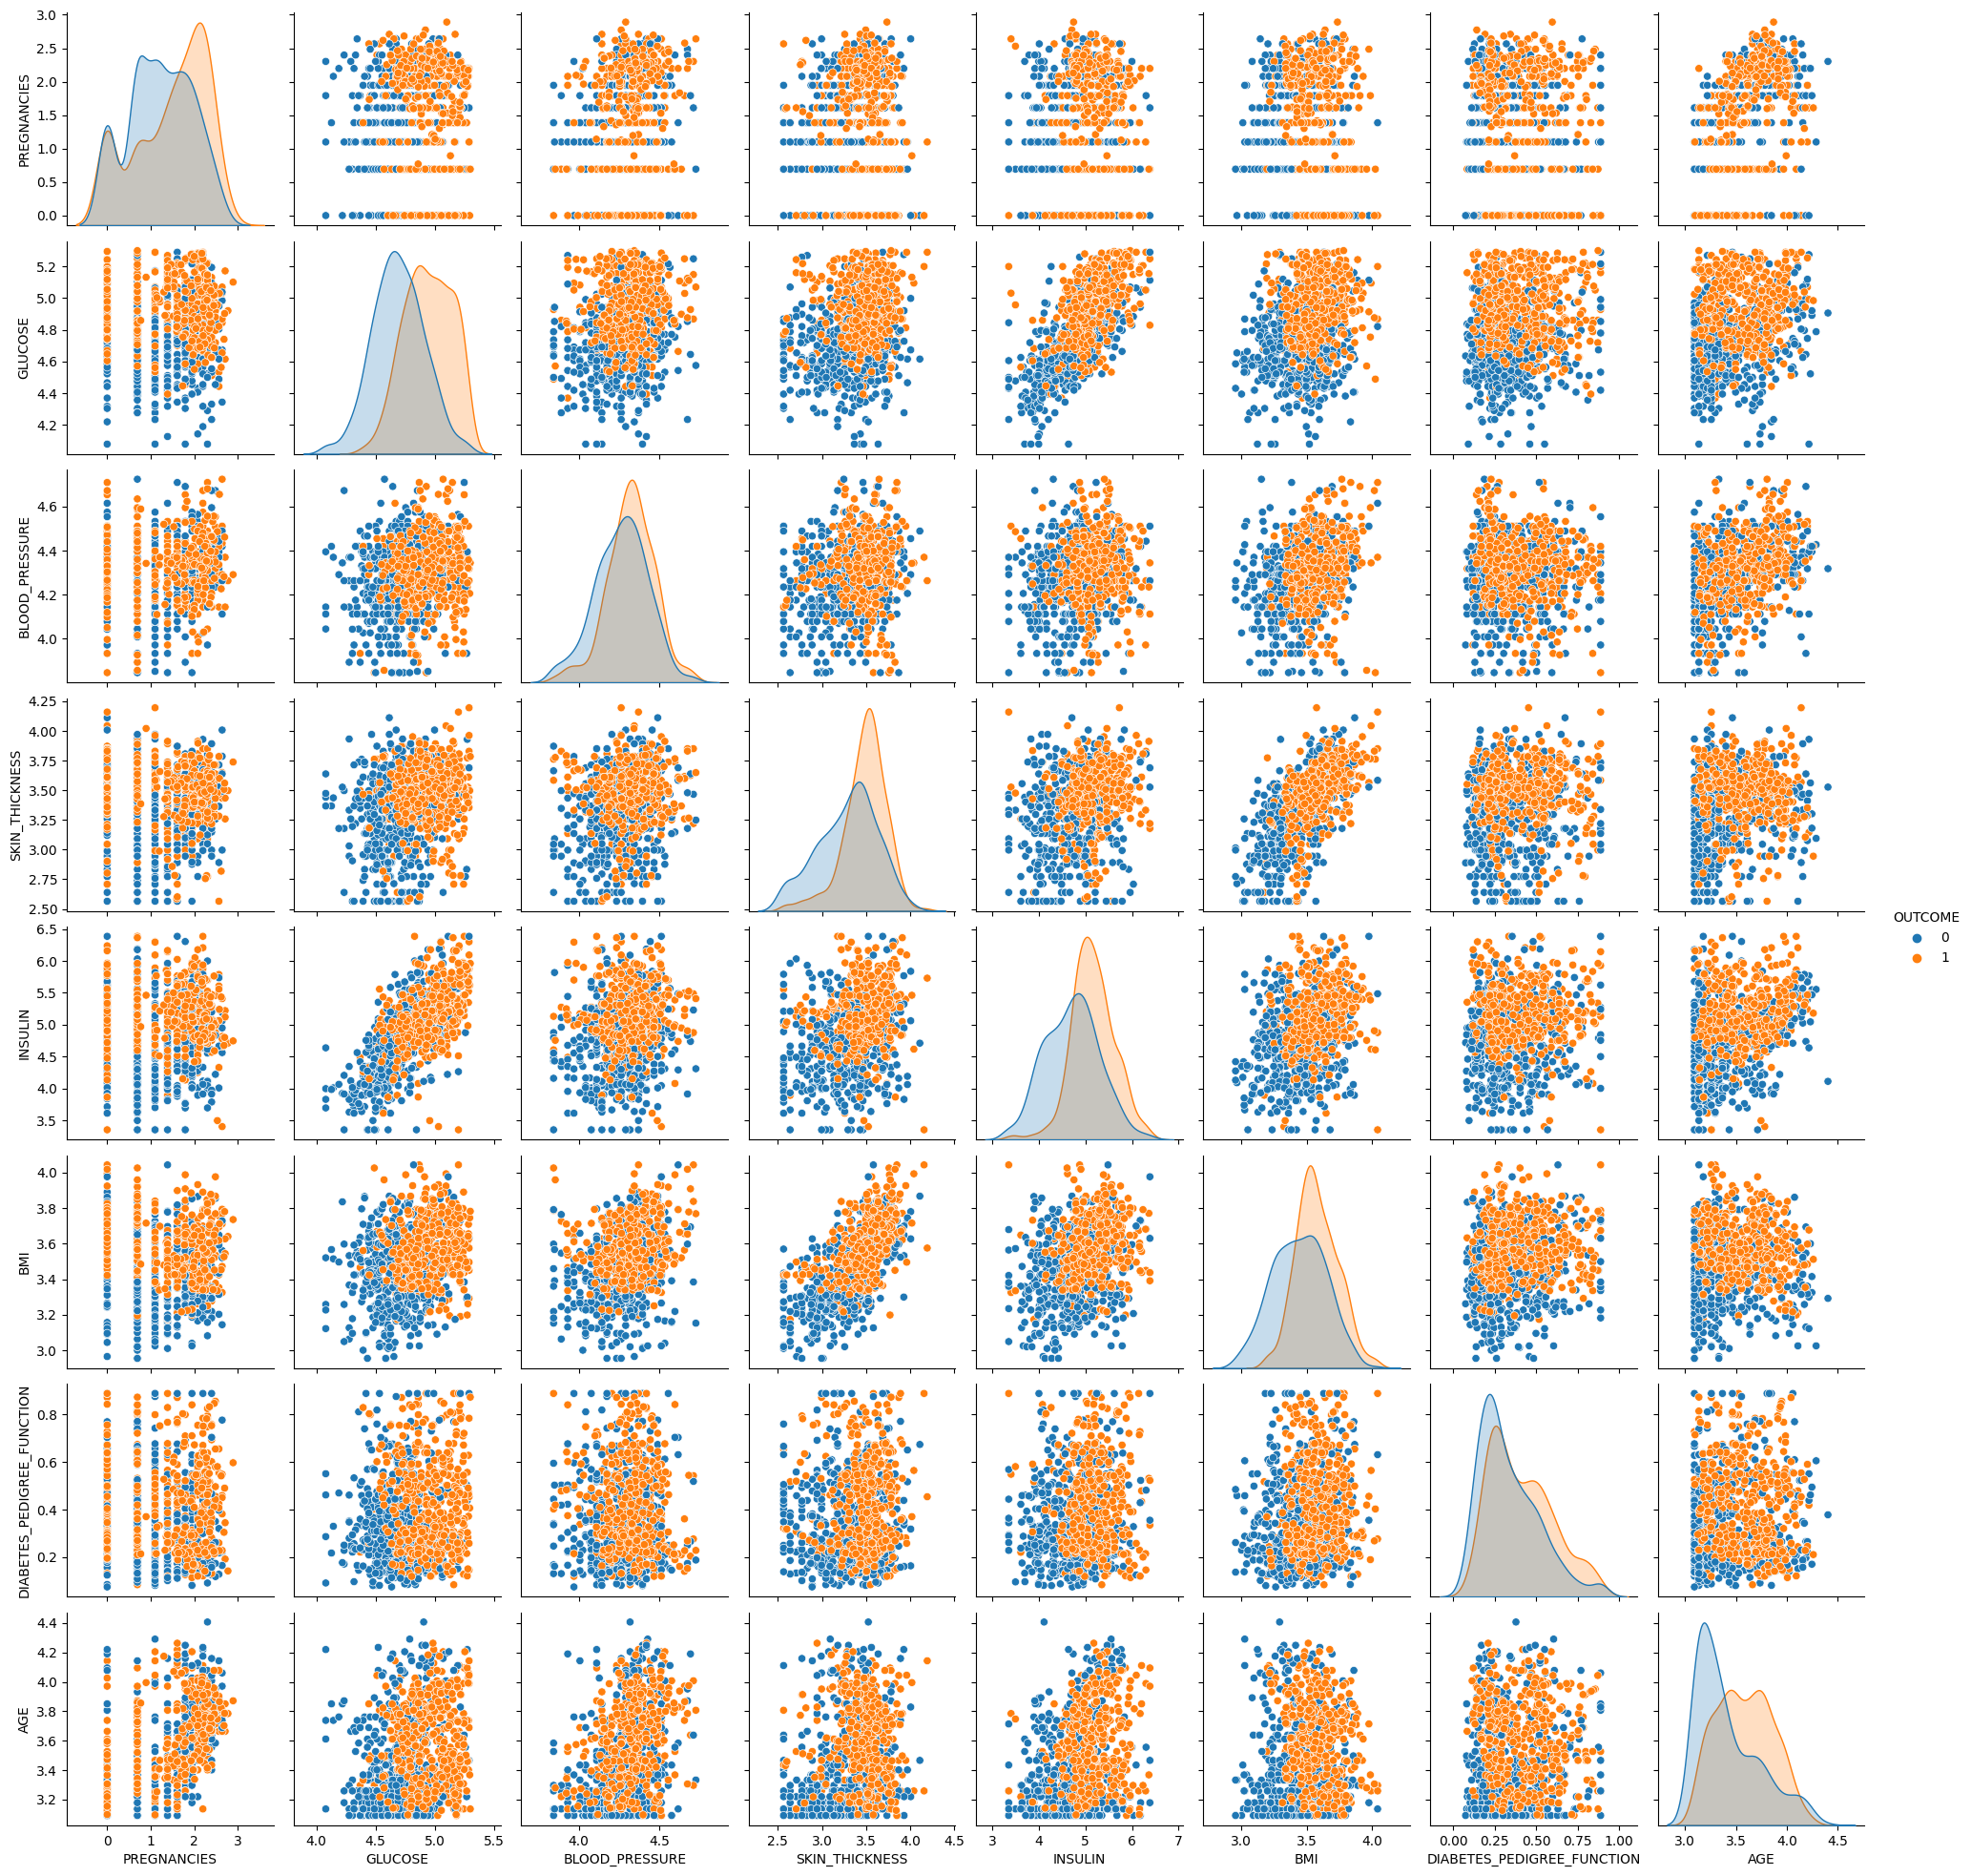

In [931]:
sns.pairplot(diabetes, hue='OUTCOME')

Text(0.5, 1.0, 'Correlation Matrix')

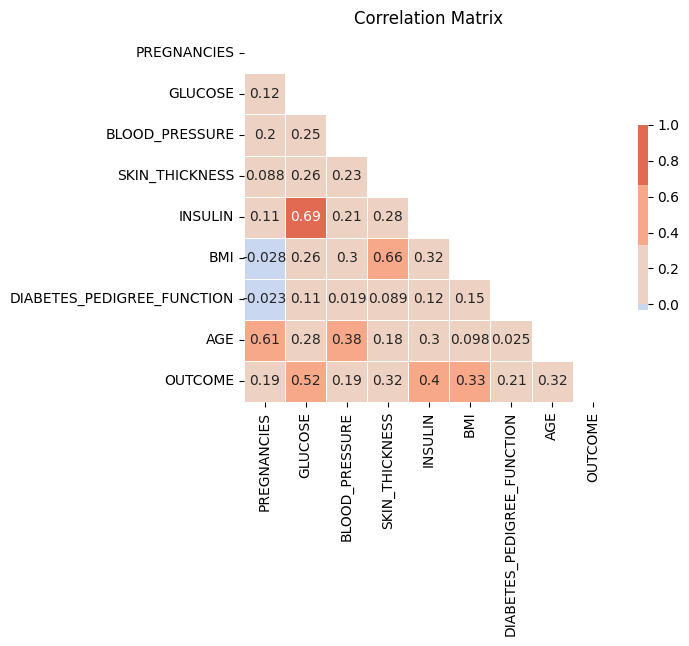

In [932]:
# HEATMAP for checking dependencies of variables on each other.

mask = np.triu(np.ones_like(diabetes.corr('spearman'), dtype=bool))
sns.heatmap(diabetes.corr('spearman'),mask=mask,cmap=sns.color_palette('coolwarm'), vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation Matrix')

### Glucose, insulin and BMI has good impact on outcome. There is a strong positive correlation between:
1- BMI and Skin thickness
2- Pregnancies and age
3- Glucose and insulin
4- blood pressure and age

[0.07132164 0.2882616  0.04095266 0.10335733 0.15150153 0.13884323
 0.07048962 0.13527238]


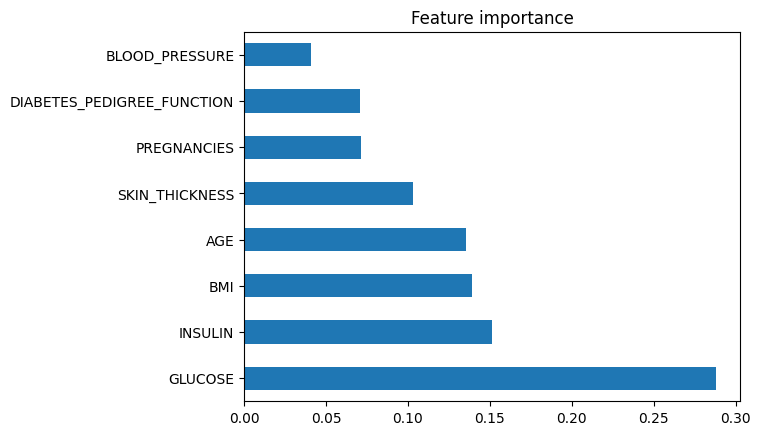

In [933]:
x = diabetes.iloc[:,0:8]  #independent columns
y = diabetes.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=500,max_depth=8)
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance")
plt.show()

### By seeing the above graph , we can see that outcome is somehow dependent on all the variables. So, here we are not dropping any variable.

# Model building

We will use- 
1- Logistic Regression,
2- KNN 
3- Decision Tree, 
4- Random Forest 
5- SVM.

In [934]:
# Train-Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.20, random_state =101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


In [935]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# converting back into dataframe format
x_train_norm=pd.DataFrame(x_train_norm,columns=x_train.columns)
x_test_norm=pd.DataFrame(x_test_norm,columns=x_test.columns)
x_train_norm
x_test_norm

PREGNANCIES   GLUCOSE  BLOOD_PRESSURE  SKIN_THICKNESS   INSULIN  \
0       0.760188  0.944872        0.770385        0.625000  0.682170   
1       0.936921  0.439604        0.606948        0.425383  0.616188   
2       0.000000  0.397958        0.705071        0.425383  0.085688   
3       0.696944  0.701835        0.704879        0.526378  0.889468   
4       0.760188  0.307729        0.209258        0.294375  0.425110   
..           ...       ...             ...             ...       ...   
195     0.239812  0.397958        0.416532        0.045660  0.103041   
196     0.000000  0.587800        0.546896        0.232983  0.266307   
197     0.719437  0.949246        0.101165        0.589939  0.864540   
198     0.567678  0.921609        0.601851        0.699576  0.750905   
199     0.239812  0.713274        0.546896        0.448534  0.608983   

          BMI  DIABETES_PEDIGREE_FUNCTION       AGE  
0    0.565043                    0.341362  0.415409  
1    0.617879                    0.331822  0.576969  
2    0.637234                    0.179045  0.097162  
3    0.634659                    0.111440  0.551246  
4    0.257265                    0.064429  0.509363  
..        ...                         ...       ...  
195  0.064703                    0.261959  0.126972  
196  0.455141                    0.215950  0.155657  
197  0.549373                    0.647932  0.352902  
198  0.660208                    0.208040  0.267333  
199  0.246343                    0.649278  0.066134  

[200 rows x 8 columns]

In [936]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Importing accuracy metrics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix,classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve


In [937]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [938]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()

model=[lr,knn,dt,rf,svm]

model_names = ['LogisticRegression','KNN','Decision Tree','Random Forest','SVM']

for i in range(len(model)):    
    model[i].fit(x_train_norm, y_train)
    y_pred = model[i].predict(x_test_norm)
    print(model_names[i])
    print('accuracy score =',accuracy_score(y_test, y_pred))
    print('AUC =',roc_auc_score(y_test, y_pred))
    print('F1_score =',(f1_score(y_test, y_pred)))
    print("================================================================")

LogisticRegression
accuracy score = 0.75
AUC = 0.7515878616796048
F1_score = 0.761904761904762
KNN
accuracy score = 0.765
AUC = 0.7571831837886885
F1_score = 0.7965367965367964
Decision Tree
accuracy score = 0.78
AUC = 0.7782034479282185
F1_score = 0.7981651376146789
Random Forest
accuracy score = 0.825
AUC = 0.8231172497227544
F1_score = 0.8401826484018265
SVM
accuracy score = 0.795
AUC = 0.7901502167557215
F1_score = 0.8177777777777778


# using GridsearchCV for hyperparameter tuning to get more accurate results

In [939]:
from sklearn.model_selection import GridSearchCV

In [940]:
lrp= {'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
knnp = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':np.arange(1,100,2),'weights':['uniform', 'distance']}
dtp = {'criterion' : ["gini", "entropy", "log_loss"],'max_depth': [3,5,7,9,11,None], 'min_samples_split': [2, 3, 4],'max_features':[0.5,0.75,1]}
rfp = {'criterion': ["gini", "entropy", "log_loss"], 'max_depth':[1,3,5,7,9],'max_features':["sqrt", "log2", None]}
svmp= {'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

parameter=[lrp,knnp,dtp,rfp,svmp]
name=['Logistic Regression','KNN model','Decision tree model','Random Forest Model','Support vector machine']

for i in range(len(model)):
    Grid=GridSearchCV(estimator=model[i], param_grid=parameter[i],n_jobs=-1, cv=5, scoring='roc_auc')
    Grid.fit(x_train_norm,y_train)
    y_pred = Grid.predict(x_test_norm)
    print(name[i])
    print("Best Parameters: ", Grid.best_params_)
    print("Best Score: ", Grid.best_score_)
    print("================================================")

Logistic Regression
Best Parameters:  {'solver': 'liblinear'}
Best Score:  0.8370696406304103
KNN model
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best Score:  0.8703208932446351
Decision tree model
Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 3}
Best Score:  0.7986430146947796
Random Forest Model
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}
Best Score:  0.8724635826364755
Support vector machine
Best Parameters:  {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
Best Score:  0.8574240903612107


In [941]:
lr=LogisticRegression( solver = 'liblinear')
knn=KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance')
dt=DecisionTreeClassifier(criterion = 'log_loss', max_depth = 5, max_features = 0.75, min_samples_split = 2)
rf=RandomForestClassifier(criterion = 'log_loss', max_depth = 9, max_features = 'sqrt')
svm=SVC(C = 10, gamma = 0.5, kernel = 'rbf', probability=True)

model=[lr,knn,dt,rf,svm]
name=['Logistic Regression','KNN model','Decision tree model','Random Forest Model','Support vector machine']

for i in range(len(model)):
    model[i].fit(x_train_norm, y_train)
    y_pred = model[i].predict(x_test_norm)
    print(name[i])
    print('accuracy score =',accuracy_score(y_test, y_pred))
    print('AUC =',roc_auc_score(y_test, y_pred))
    print('F1_score =',(f1_score(y_test, y_pred)))
    # saving the results
    models.append(name[i])
    model_accuracy.append(accuracy_score(y_test, y_pred))
    model_auc.append(roc_auc_score(y_test, y_pred))
    model_f1.append(np.sqrt(f1_score(y_test, y_pred)))
    print("================================================")
    

Logistic Regression
accuracy score = 0.745
AUC = 0.7442786571226938
F1_score = 0.7627906976744188
KNN model
accuracy score = 0.81
AUC = 0.7984675874584133
F1_score = 0.8416666666666667
Decision tree model
accuracy score = 0.755
AUC = 0.7480088718620829
F1_score = 0.7860262008733625
Random Forest Model
accuracy score = 0.79
AUC = 0.7828410121988104
F1_score = 0.817391304347826
Support vector machine
accuracy score = 0.795
AUC = 0.7892428672245186
F1_score = 0.8193832599118943


# Now ploting ROC Curve using best parameters for each models

Logistic Regression
AUC Score: 0.844
KNN model
AUC Score: 0.873
Decision tree model
AUC Score: 0.774
Random Forest Model
AUC Score: 0.882
Support vector machine
AUC Score: 0.874


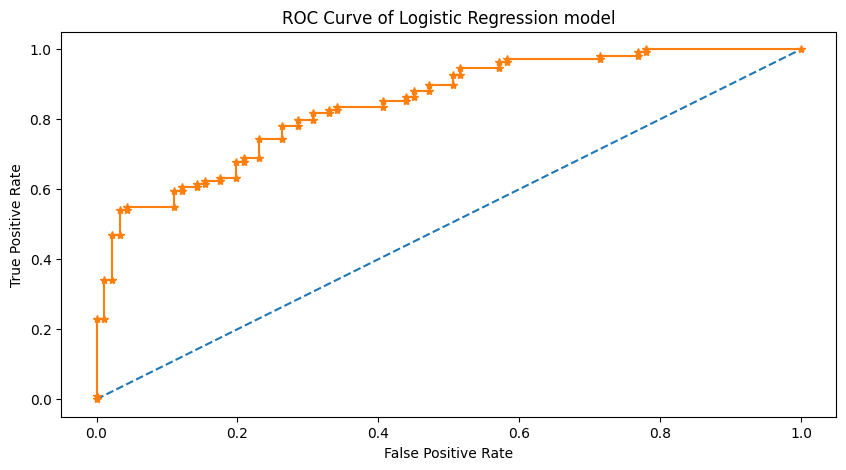

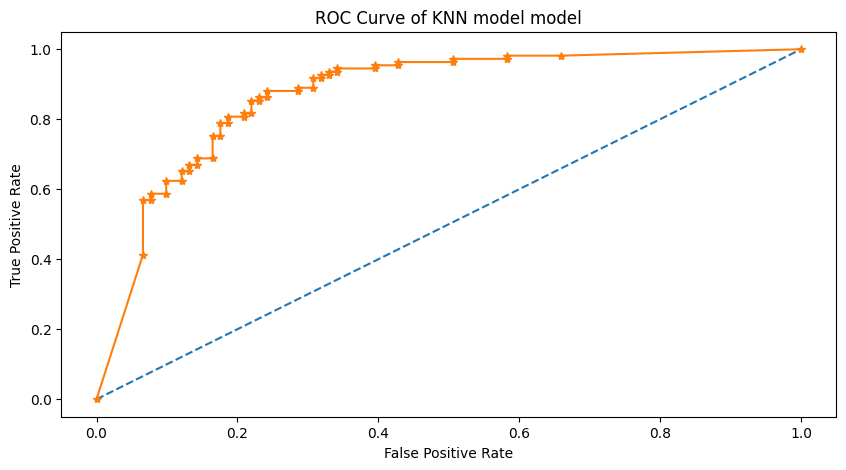

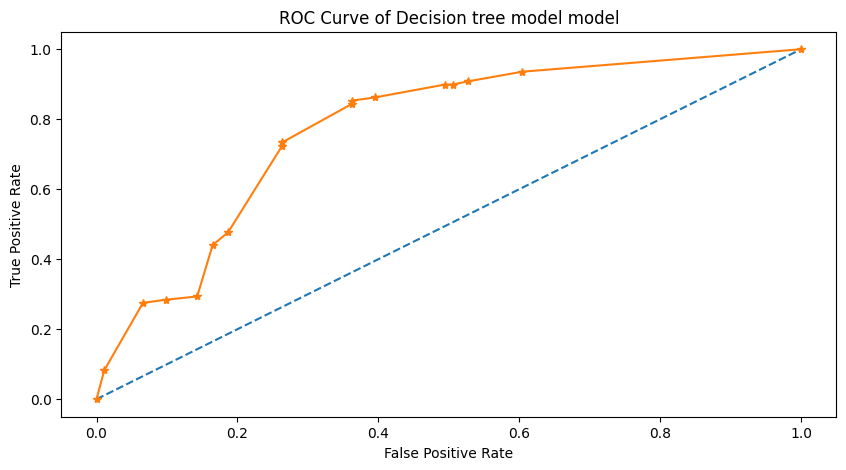

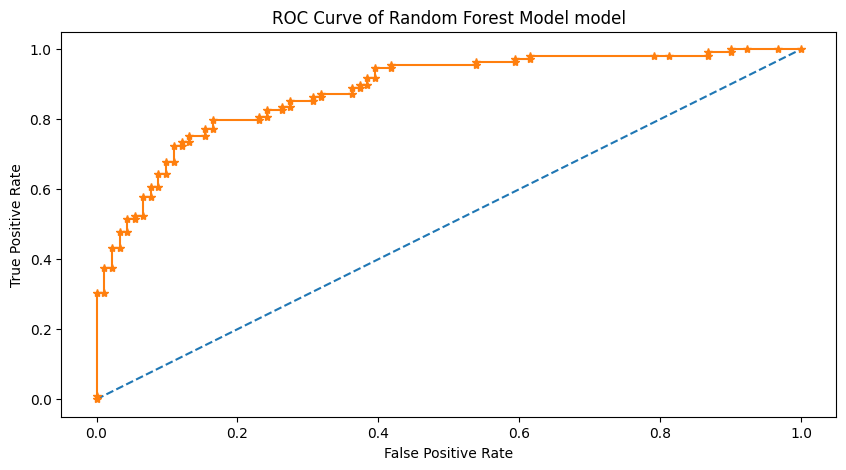

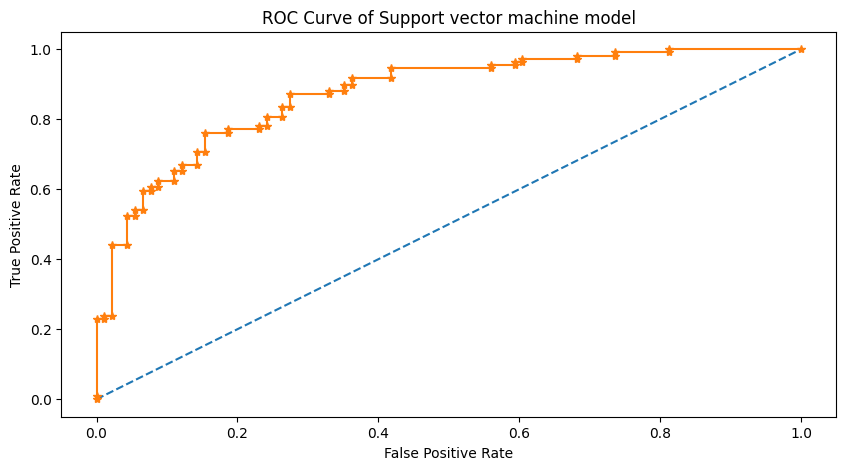

In [942]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
for i in range(len(model)):
    model[i].fit(x_train_norm, y_train)
    plt.figure(figsize=(10,5))                       
    prob = model[i].predict_proba(x_test_norm)               
    prob = prob[:, 1]                              #probabilities for the positive outcome only
    auc = roc_auc_score(y_test, prob)       
    fpr, tpr, thresholds = roc_curve(y_test, prob)      
    print(name[i])
    print('AUC Score: %.3f' %auc)
    plt.plot([0, 1], [0, 1], linestyle='--')         
    plt.plot(fpr, tpr, marker='*')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve of {name[i]} model")
    print("================================================")

# Now we will check the best performing Model

In [943]:
models_table = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
models_table

model  accuracy  f1_score       auc
0     Logistic Regression     0.745  0.873379  0.744279
1               KNN model     0.810  0.917424  0.798468
2     Decision tree model     0.755  0.886581  0.748009
3     Random Forest Model     0.790  0.904097  0.782841
4  Support vector machine     0.795  0.905198  0.789243

Text(0.5, 1.0, 'Comparison of Different Classification Algorithms')

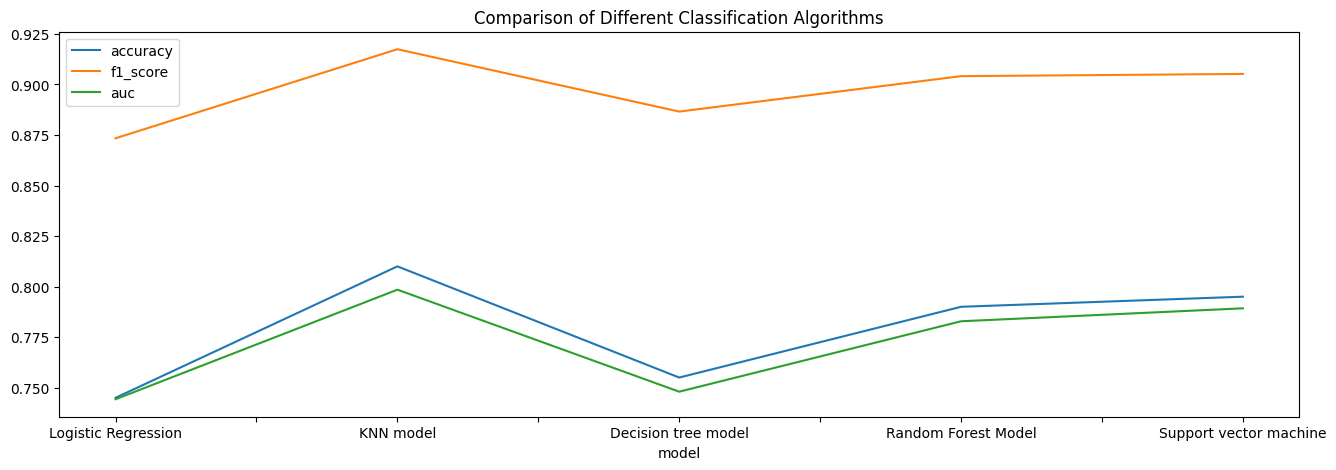

In [944]:
models_table = models_table.set_index('model')
models_table.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

# Among all models, KNN has given best accuracy and f1_score. Therefore we will build final model using KNN.

In [980]:
final_model = knn
y_final_pred=final_model.predict(x_test_norm)

In [981]:
c_report = classification_report(y_test, y_final_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        91
           1       0.77      0.93      0.84       109

    accuracy                           0.81       200
   macro avg       0.83      0.80      0.80       200
weighted avg       0.82      0.81      0.81       200



In [982]:
confusion = confusion_matrix(y_test, y_final_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[ 61  30]
 [  8 101]]


In [983]:
T_P = confusion[1,1]            # True positive 
T_N = confusion[0,0]            # True negatives
F_P = confusion[0,1]            # False positives
F_N = confusion[1,0]            # False negatives

print('True Positve :',T_P)
print('True Negative :',T_N)
print('False Positive :',F_P)
print('False Negative :',F_N)

True Positve : 101
True Negative : 61
False Positive : 30
False Negative : 8


In [985]:
Accuracy = (T_P+T_N)/(T_P+T_N+F_P+F_N)
Precision = T_P/(T_P+F_P)
Sensitivity = T_P/(T_P+F_N)                     
Specificity = T_N/(T_N+F_P)

print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)

Accuracy: 0.810
Precision: 0.771
Sensitivity: 0.927
Specificity: 0.670


# The chosen model is the most effective for predicting diabetes because it is more sensitive, which is important according to our problem statement. We don't want people with diabetes to be mistakenly labelled as non-diabetics.

In [987]:
final_values = pd.DataFrame({'Actual Outcome': y_test, 'Predicted Outcome': y_final_pred})
final_values.sample(10)

Actual Outcome  Predicted Outcome
379               0                  0
408               1                  1
951               1                  1
391               1                  1
860               1                  1
269               1                  1
698               0                  0
7                 0                  1
997               1                  1
693               1                  1